In [19]:
import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=1, releaselevel='final', serial=0)

## Set Up

In [41]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor

In [9]:
import matplotlib.pyplot as plt

## Load Data

In [11]:
df = pd.read_csv('example.csv')
df.head()

,power,violence
0,-10,-3
1,-9,-4
2,-8,-5
3,-7,-6
4,-6,0


## Graph Data 

In [12]:
X=df.power
Y=df.violence

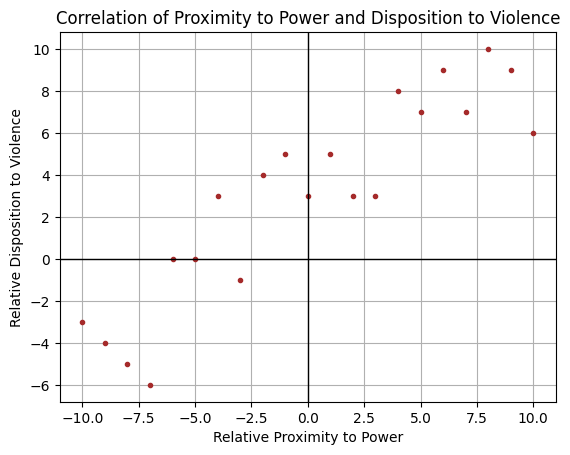

In [17]:
plt.plot(X, Y,'o',markersize=3, color='brown')
plt.xlabel('Relative Proximity to Power')
plt.ylabel('Relative Disposition to Violence')
plt.title('Correlation of Proximity to Power and Disposition to Violence')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid()

## Basic Analysis

In [21]:
corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.902


In [24]:
rank, _ = spearmanr(X,Y)
print('Pearsons correlation: %.3f' % rank)

Pearsons correlation: 0.900


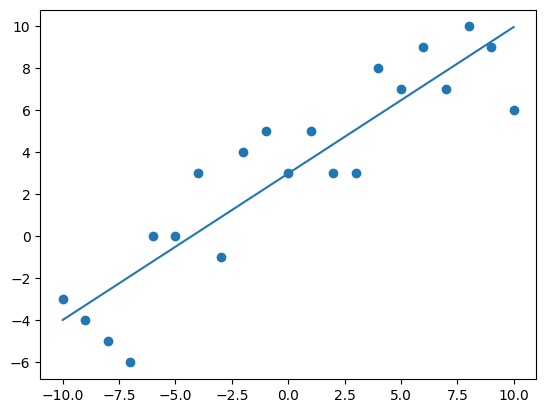

0.9022980260631074


In [32]:
slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, Y)
plt.plot(X, mymodel)
plt.show()

In [35]:
print('Slope: %.3f' % slope)
print('Intercept: %.3f' % intercept)
print('R: %.3f' % r)

Slope: 0.697
Intercept: 3.000
R: 0.902


## CART Analyis

In [68]:
## load data
df2 = pd.read_csv('example2.csv')
df2.head()

,violence,class,gender,ethinicity,social,education
0,-10,-3,-5,-9,-7,-7
1,-9,-3,-5,-9,-6,-7
2,-8,-1,-8,-4,-5,-7
3,-7,-3,-7,-6,-5,0
4,-6,-4,-5,-1,-3,-2


In [69]:
x = df2.drop('violence', axis = 1)
y = df2['violence']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 28)

In [71]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0,splitter='best', max_depth=2)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  6.0


[Text(0.5, 0.8333333333333334, 'class  <= 4.0\nsquared_error = 38.448\nsamples = 20\nvalue = -0.05'),
 Text(0.25, 0.5, 'gender <= -4.0\nsquared_error = 10.0\nsamples = 11\nvalue = -5.0'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2.0\nsamples = 5\nvalue = -8.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2.917\nsamples = 6\nvalue = -2.5'),
 Text(0.75, 0.5, 'gender <= 4.5\nsquared_error = 6.667\nsamples = 9\nvalue = 6.0'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 2.5'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.0\nsamples = 7\nvalue = 7.0')]

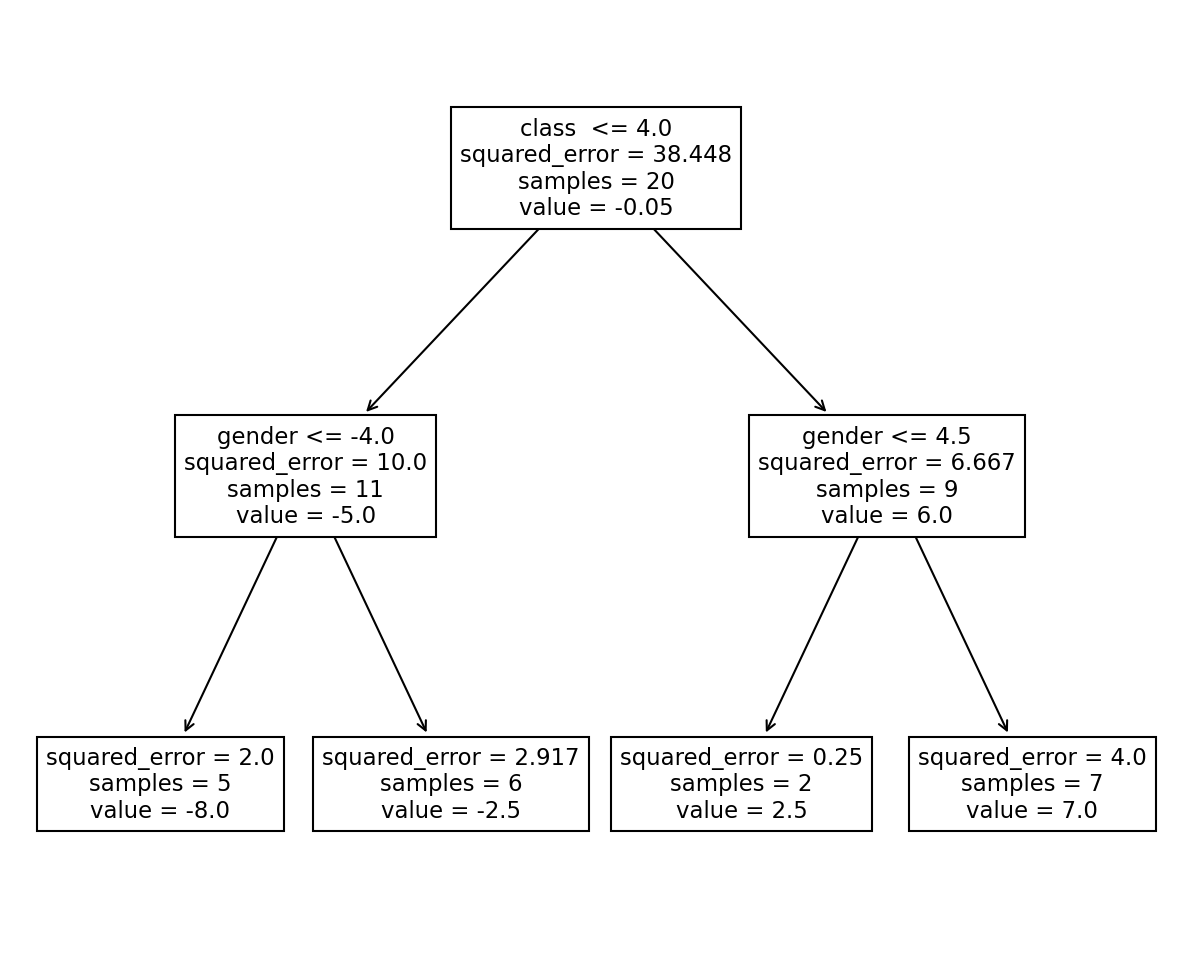

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=x.columns)

## To read this true is left and false is right